In [1]:
import pandas as pd

import numpy as np

from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
 

In [2]:
df=pd.read_csv("Fruits.csv")
df

,Fruit,T,H,CO,D,Spoiled
0,Banana,24,60,401,5,Yes
1,Banana,22,55,399,6,Yes
2,Banana,25,50,400,5,Yes
3,Banana,21,45,398,7,Yes
4,Banana,19,52,403,7,Yes
...,...,...,...,...,...,...
245,Lemon,22,69,398,5,No
246,Lemon,23,70,400,4,No
247,Lemon,24,72,401,3,No
248,Lemon,21,76,404,4,No


In [3]:
df1 = pd.get_dummies(df["Spoiled"])
df1
df_two = pd.concat((df, df1), axis=1)
df_two = df_two.drop(["Spoiled"], axis=1)
df_two = df_two.drop(["No"],axis=1)
df2 = df_two.rename(columns={"Yes": "Spoiled"})
df2
 

,Fruit,T,H,CO,D,Spoiled
0,Banana,24,60,401,5,1
1,Banana,22,55,399,6,1
2,Banana,25,50,400,5,1
3,Banana,21,45,398,7,1
4,Banana,19,52,403,7,1
...,...,...,...,...,...,...
245,Lemon,22,69,398,5,0
246,Lemon,23,70,400,4,0
247,Lemon,24,72,401,3,0
248,Lemon,21,76,404,4,0


In [4]:
df_one = pd.get_dummies(df2["Fruit"])
df2 = pd.concat((df_one, df2), axis=1)
df2 = df2.drop(["Fruit"], axis=1)
df2


,Apple,Banana,Banana,Grapes,Grapes,Jackfruit,Jackfruit,Lemon,Litchi,Mango,Mango,Papaya,Plum,Tomato,T,H,CO,D,Spoiled
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,24,60,401,5,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,22,55,399,6,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,25,50,400,5,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,21,45,398,7,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,19,52,403,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,1,0,0,0,0,0,0,22,69,398,5,0
246,0,0,0,0,0,0,0,1,0,0,0,0,0,0,23,70,400,4,0
247,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24,72,401,3,0
248,0,0,0,0,0,0,0,1,0,0,0,0,0,0,21,76,404,4,0


In [5]:
x = df2.drop('Spoiled',axis = 1).copy()
x

,Apple,Banana,Banana,Grapes,Grapes,Jackfruit,Jackfruit,Lemon,Litchi,Mango,Mango,Papaya,Plum,Tomato,T,H,CO,D
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,24,60,401,5
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,22,55,399,6
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,25,50,400,5
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,21,45,398,7
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,19,52,403,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,1,0,0,0,0,0,0,22,69,398,5
246,0,0,0,0,0,0,0,1,0,0,0,0,0,0,23,70,400,4
247,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24,72,401,3
248,0,0,0,0,0,0,0,1,0,0,0,0,0,0,21,76,404,4


In [6]:
y = df2['Spoiled'].copy()
y

0      1
1      1
2      1
3      1
4      1
      ..
245    0
246    0
247    0
248    0
249    0
Name: Spoiled, Length: 250, dtype: uint8

In [7]:
test_size = 0.20
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [8]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

In [9]:
gradient_booster.fit(x_train,y_train)


GradientBoostingClassifier()

In [10]:
print(classification_report(y_test,gradient_booster.predict(x_test)))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        25
           1       0.68      0.68      0.68        25

    accuracy                           0.68        50
   macro avg       0.68      0.68      0.68        50
weighted avg       0.68      0.68      0.68        50



In [11]:
print(classification_report(y_train,gradient_booster.predict(x_train)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       125
           1       0.95      0.97      0.96        75

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [12]:
from sklearn.metrics import confusion_matrix
y_prediction=gradient_booster.predict(x_test)
cm1=confusion_matrix(y_test,y_prediction)

Text(24.0, 0.5, 'Truth')

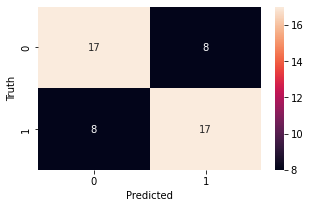

In [13]:
%matplotlib inline
plt.figure(figsize=(5,3))
sns.heatmap(cm1, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
from sklearn.model_selection import GridSearchCV
model=GradientBoostingClassifier()
parameters={'learning_rate': [0.01,0.02,0.03],
           'subsample': [0.9,0.5,0.2],
            'n_estimators':[100,500,1000],
            'max_depth': [4,6,8]
             }
grid=GridSearchCV(estimator=model,param_grid=parameters,cv=2, n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2]})

In [15]:
print(classification_report(y_test,grid.predict(x_test)))

              precision    recall  f1-score   support

           0       0.56      0.72      0.63        25
           1       0.61      0.44      0.51        25

    accuracy                           0.58        50
   macro avg       0.59      0.58      0.57        50
weighted avg       0.59      0.58      0.57        50



In [16]:
print(classification_report(y_train,grid.predict(x_train)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       125
           1       0.99      0.99      0.99        75

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [17]:
from sklearn.metrics import confusion_matrix
y_prediction=grid.predict(x_test)
cm2=confusion_matrix(y_test,y_prediction)

Text(24.0, 0.5, 'Truth')

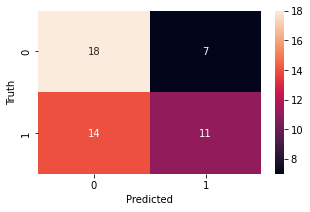

In [18]:
%matplotlib inline
plt.figure(figsize=(5,3))
sns.heatmap(cm2, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')